**Function To Fetch & Download The Dataset**

**I will assume that you know the basic functions used in Machine Learning so I will explain complex part of the code only.**

In [17]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np

Here I created a function which search for the *datasets/housing.tgz* file in this folder. If the file is not found it creates a new directory/folder inside this current directory/folder. Then it downloads the *housing.tgz* from the ageron/data GitHub repository and extract it. This creates a datasets/housing directory which has housing.csv file.

In [4]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True,exist_ok=True)
        url="https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url,tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

For simplification I had used variable **df** assigned to housing.
And use *head()* function to display top five rows of dataset.

In [5]:
df = housing
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


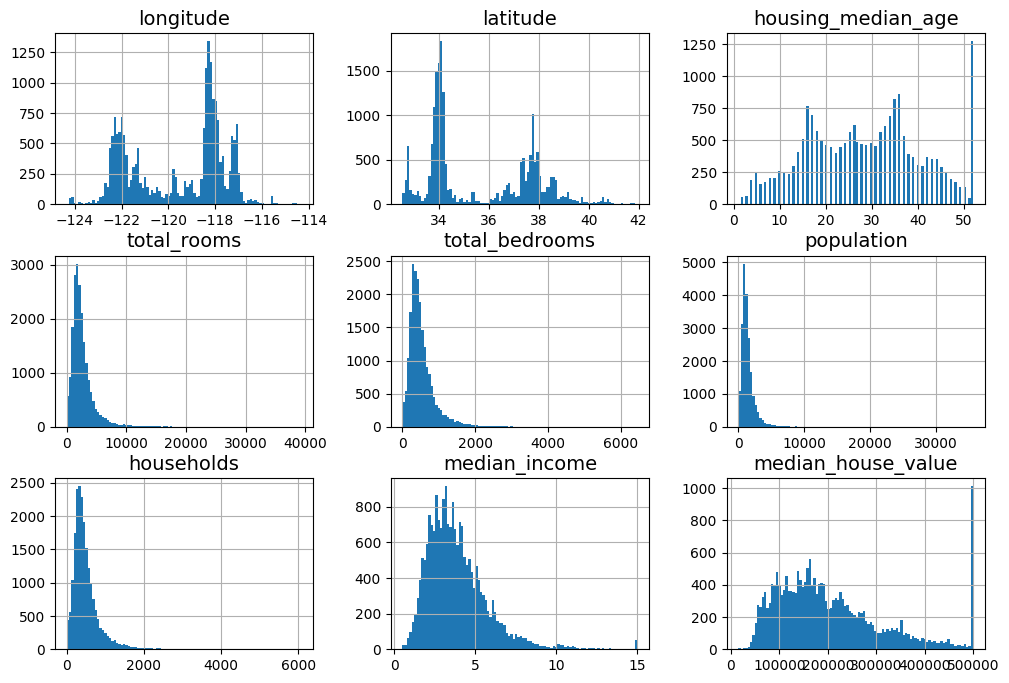

In [14]:
import matplotlib.pyplot as plt 

plt.rc('font',size=14)
plt.rc('axes',labelsize=14,titlesize=14)
plt.rc('legend',fontsize=14)
plt.rc('ytick',labelsize=10)
plt.rc('xtick',labelsize=10)


df.hist(bins=100,figsize=(12,8))
plt.show()

Now we are going to split the dataset into training set and testing set to train our model. For this, Scikit-Learn provides few functions to split the dataset.

In [10]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,random_state=42,test_size=0.2)

In given dataset, median income values had vary significantly. For instance, most median income values is cluster around $15,000 to $60,000, but some can be much higher. To analyze the data more effectively, it's often useful to categorize these income values into discrete groups or strata. 

Explanation:

**Use `pd.cut()` to Create Categories**: We use the `pd.cut()` function to assign each median income value to one of these categories.

Here's the code to achieve this:
**bins=[0., 1.5, 3.0, 4.5, 6., np.inf]:**  Defines the edges of the bins for the categories. np.inf ensures that values beyond the last bin edge are included in the final category.

**labels=[1, 2, 3, 4, 5]:**  Assigns labels to the bins, creating five categories with labels from 1 to 5.

By categorizing income values in this way, we can better understand the distribution of income across different strata and ensure that our analysis is more meaningful. It also helps in avoiding issues with strata that are too small or too numerous, which could bias the estimates of their importance.

In [ ]:
df['income_cat'] = pd.cut(df['median_income'],bins=[0.,1.5,3.0,4.5,6.0, np.inf],labels=[1,2,3,4,5])
df['income_cat']

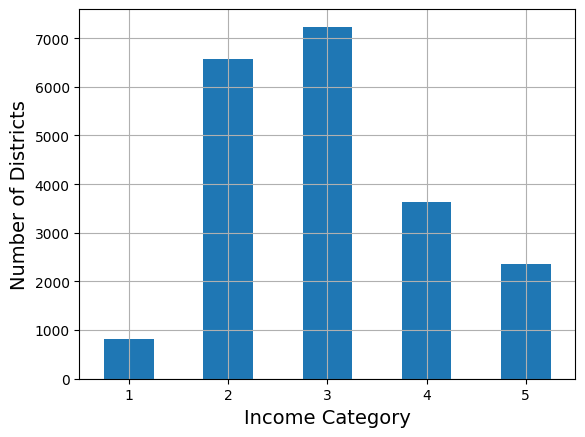

In [34]:
df['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel('Income Category')
plt.ylabel('Number of Districts')
plt.show()

In [38]:
df['income_cat'].value_counts(normalize=True)*100 

income_cat
3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: proportion, dtype: float64

### Why Use Stratified Shuffle Split?

When working with datasets, it's crucial to ensure that your training and testing sets are representative of the overall data distribution. This is particularly important when dealing with imbalanced classes or when specific strata (e.g., income categories) are of interest.

### Purpose of Stratified Shuffle Split

Stratified Shuffle Split is used to maintain the proportion of each category or class in both the training and testing sets. This helps in several ways:

1. **Preserves Distribution**: Ensures that each subset (training and testing) has a representative distribution of the categories or classes. This is especially important if your data contains imbalanced classes or specific strata that need to be represented proportionally.

2. **Reduces Bias**: Helps to reduce bias that might arise if one of the subsets (e.g., the test set) is not representative of the entire dataset. For instance, if you're analyzing income categories, stratification ensures that each category is properly represented in both training and testing sets.

3. **Improves Model Evaluation**: By preserving the distribution of classes or categories, you get a more accurate evaluation of the model’s performance, as it is tested on a set that is representative of the training data.

`stratify=df['income_cat']`: Ensures that the split maintains the same proportion of each category in the 'income_cat' column in both the training and test sets.

In [39]:
strat_train_set,strat_test_set = train_test_split(df,test_size=0.2,random_state=42,stratify=df['income_cat'])

In [42]:
strat_test_set['income_cat'].value_counts()/ len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64